## Import packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Import data

In [2]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

## Key Dates

In [4]:
# Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20' # Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20' 

## Data Preprocessing

In [5]:
df.head()

PAH3.DE                          BMW.DE                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN  7.883176  7.883176  7.866293   
1996-11-11     NaN  NaN NaN   NaN    NaN  7.874518  7.878847  7.827765   
1996-11-12     NaN  NaN NaN   NaN    NaN  7.861965  7.934259  7.832094   
1996-11-13     NaN  NaN NaN   NaN    NaN  7.941185  7.941185  7.874519   
1996-11-14     NaN  NaN NaN   NaN    NaN  7.881012  7.917376  7.849410   

                              VOW3.DE                        
               Close   Volume    Open High Low Close Volume  
Date                                                         
1996-11-08  7.866293   767000     NaN  NaN NaN   NaN    NaN  
1996-11-11  7.845080   260000     NaN  NaN NaN   NaN    NaN  
1996-11-12  7.904390  1066000     NaN  NaN NaN   NaN    NaN  
1996-11-13  7.891834   793000     NaN  NaN NaN   NaN    NaN  
1996-11-14  7.917376   351000     NaN  NaN NaN   NaN    NaN

In [6]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [7]:
df.head()

PAH3.DE                          BMW.DE                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN  7.883176  7.883176  7.866293   
1996-11-11     NaN  NaN NaN   NaN    NaN  7.874518  7.878847  7.827765   
1996-11-12     NaN  NaN NaN   NaN    NaN  7.861965  7.934259  7.832094   
1996-11-13     NaN  NaN NaN   NaN    NaN  7.941185  7.941185  7.874519   
1996-11-14     NaN  NaN NaN   NaN    NaN  7.881012  7.917376  7.849410   

                               ...       bmw ret_vol ret_por   ret_bmw sq_vol  \
               Close   Volume  ...                                              
Date                           ...                                              
1996-11-08  7.866293   767000  ...  7.866293     NaN     NaN       NaN    NaN   
1996-11-11  7.845080   260000  ...  7.845080     NaN     NaN -0.269670    NaN   
1996-11-12  7.904390  1066000  ...  7.904390     NaN     NaN  0.756009    NaN   
1996-11-13  7.891834   793000  ...  7.891834     NaN     NaN -0.158843    NaN   
1996-11-14  7.917376   351000  ...  7.917376     NaN     NaN  0.323648    NaN   

           sq_por    sq_bmw q_vol q_por    q_bmw  
                                                  
Date                                              
1996-11-08    NaN       NaN   NaN   NaN   767000  
1996-11-11    NaN  0.072722   NaN   NaN   260000  
1996-11-12    NaN  0.571549   NaN   NaN  1066000  
1996-11-13    NaN  0.025231   NaN   NaN   793000  
1996-11-14    NaN  0.104748   NaN   NaN   351000  

[5 rows x 27 columns]

In [8]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [9]:
df.index

DatetimeIndex(['1996-11-08', '1996-11-11', '1996-11-12', '1996-11-13',
               '1996-11-14', '1996-11-15', '1996-11-18', '1996-11-19',
               '1996-11-20', '1996-11-21',
               ...
               '2020-07-02', '2020-07-03', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', name='Date', length=6179, freq='B')

In [10]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Data Visualization

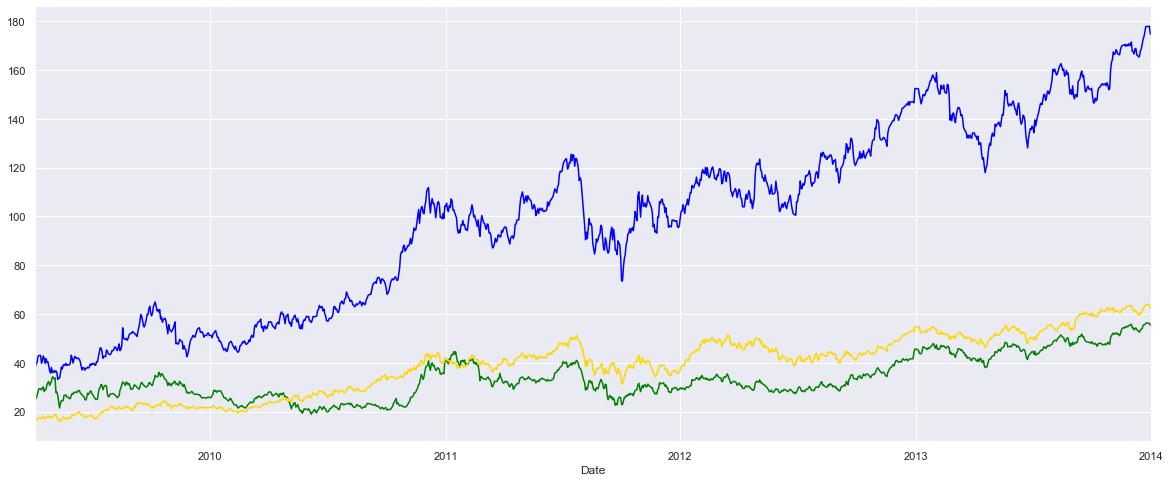

In [11]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

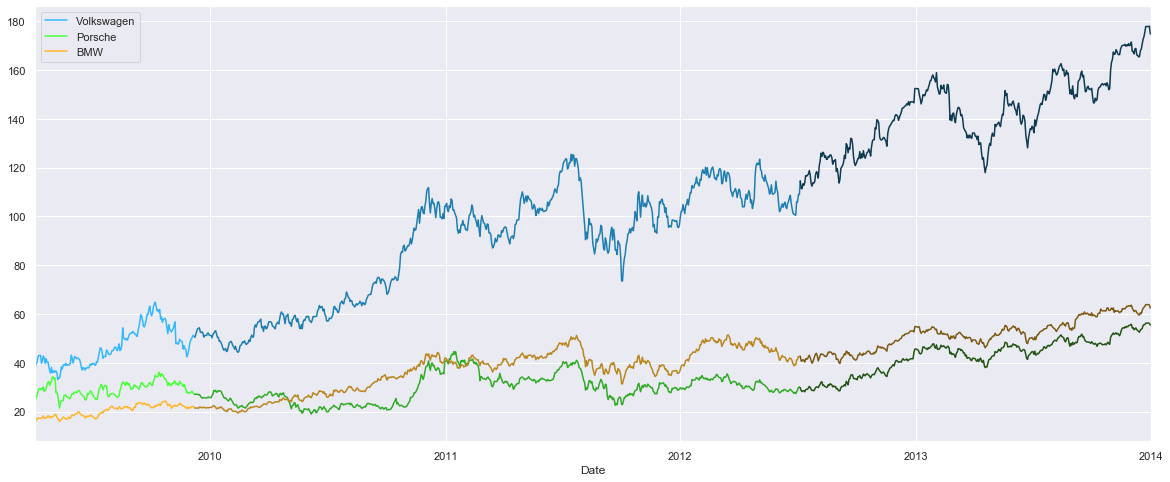

In [12]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

## Correlation

In [13]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.834805002922032
Volkswagen and BMW correlation: 	0.979938451031082
Porsche and BMW correlation: 		0.8039398539741893


In [14]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633400817761244
Volkswagen and BMW correlation: 	0.8428353474675307
Porsche and BMW correlation: 		0.6095045685009071


In [15]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7422114347356784
Volkswagen and BMW correlation: 	0.9795942993967813
Porsche and BMW correlation: 		0.7035985449323023


In [16]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.940523689428483
Volkswagen and BMW correlation: 	0.9284447118744799
Porsche and BMW correlation: 		0.9494111752233416


In [17]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2014-01-01 to 2020-07-15 00:00:00

Volkswagen and Porsche correlation: 	0.9445408614518398
Volkswagen and BMW correlation: 	0.5247973250597725
Porsche and BMW correlation: 		0.4870379580128159


## Select Models

### For Porsche

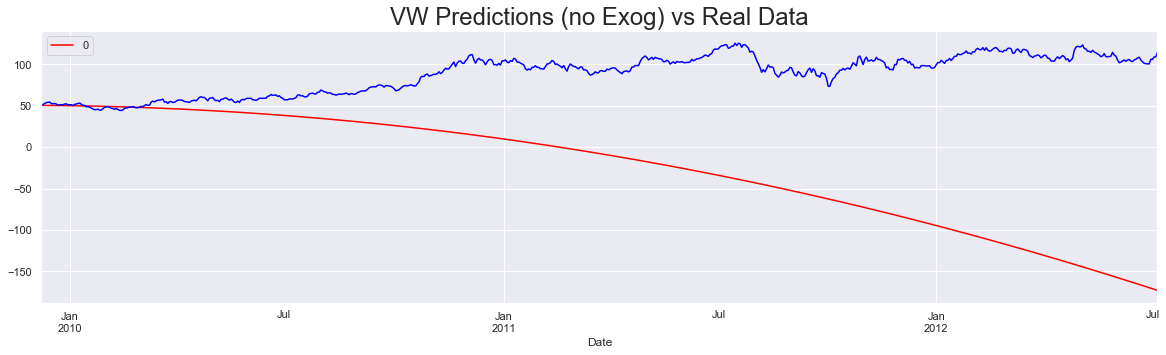

In [18]:
model_auto_pred_pr = auto_arima(
    df.vol[start_date:ann_1],
    m = 5, 
    max_p = 5, 
    max_q = 5, 
    max_P = 5, 
    max_Q = 5, 
    trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

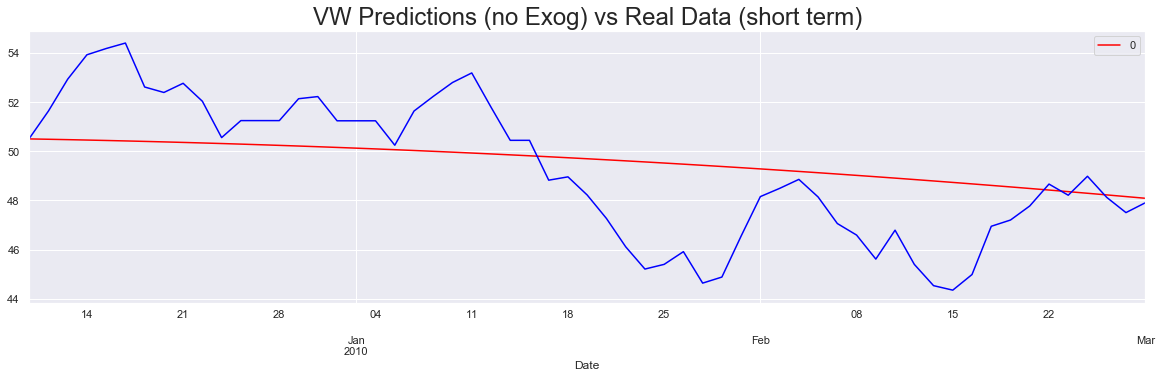

In [19]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### For Volkswagen

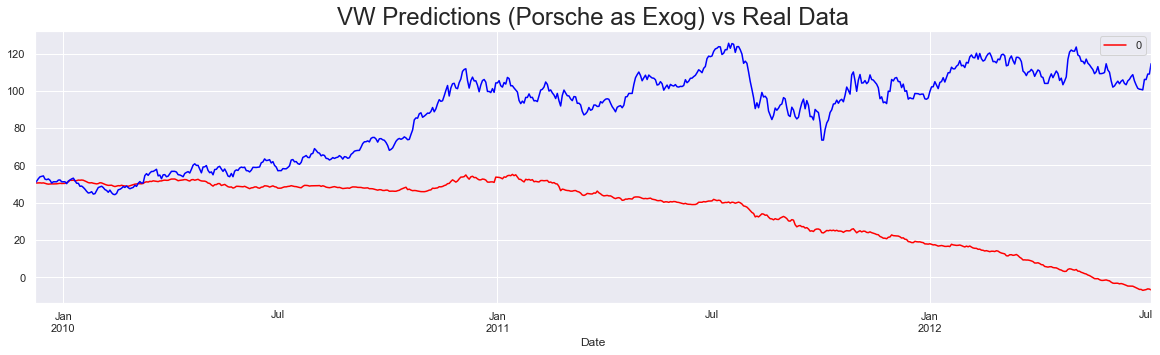

In [20]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

In [22]:
model_auto_pred_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -330.028
Date:                Wed, 15 Jul 2020   AIC                            668.055
Time:                        15:50:10   BIC                            680.760
Sample:                    04-06-2009   HQIC                           673.208
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1002      0.252      0.398      0.691      -0.394       0.594
drift         -0.0004      0.002     -0.153      0.878      -0.005       0.004
por            0.5488      0.077      7.168      0.000       0.399       0.699
sigma2         2.4382      0.156     15.639      0.000       2.133       2.744
===================================================================================
Ljung-Box (Q):                       41.51   Jarque-Bera (JB):               205.85
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.70
Prob(H) (two-sided):                  0.10   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

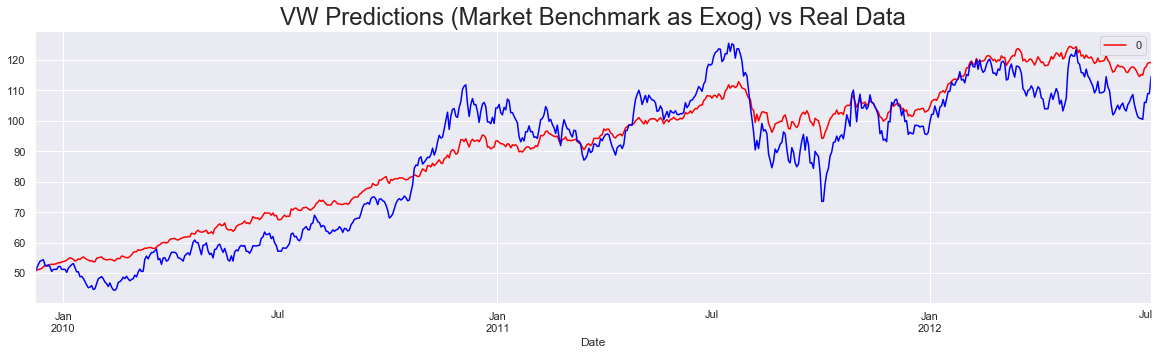

In [23]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

In [24]:
model_auto_pred_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -333.229
Date:                Wed, 15 Jul 2020   AIC                            676.457
Time:                        15:50:49   BIC                            692.366
Sample:                    04-06-2009   HQIC                           682.909
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2259      0.622      1.970      0.049       0.007       2.445
drift          0.0040      0.003      1.246      0.213      -0.002       0.010
bmw            1.0968      0.297      3.694      0.000       0.515       1.679
ar.L1          0.9367      0.027     34.737      0.000       0.884       0.990
sigma2         2.4463      0.155     15.775      0.000       2.142       2.750
===================================================================================
Ljung-Box (Q):                       34.15   Jarque-Bera (JB):               208.59
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

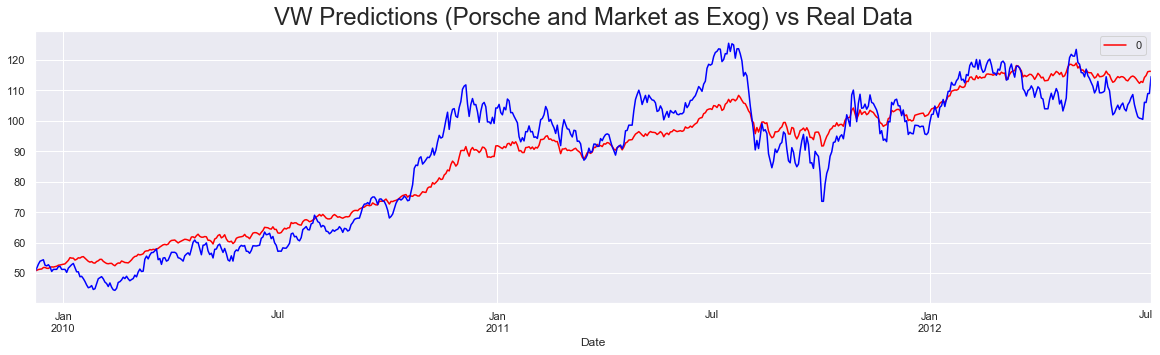

In [25]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

In [26]:
model_auto_pred_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -327.659
Date:                Wed, 15 Jul 2020   AIC                            667.319
Time:                        15:51:14   BIC                            686.409
Sample:                    04-06-2009   HQIC                           675.060
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0336      0.536      1.927      0.054      -0.018       2.085
drift          0.0049      0.003      1.405      0.160      -0.002       0.012
por            0.4345      0.100      4.324      0.000       0.238       0.631
bmw            0.6261      0.330      1.896      0.058      -0.021       1.273
ar.L1          0.9334      0.029     32.421      0.000       0.877       0.990
sigma2         2.2978      0.154     14.879      0.000       1.995       2.600
===================================================================================
Ljung-Box (Q):                       38.88   Jarque-Bera (JB):               190.46
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Volatility

### Volatility of VW for Each Period

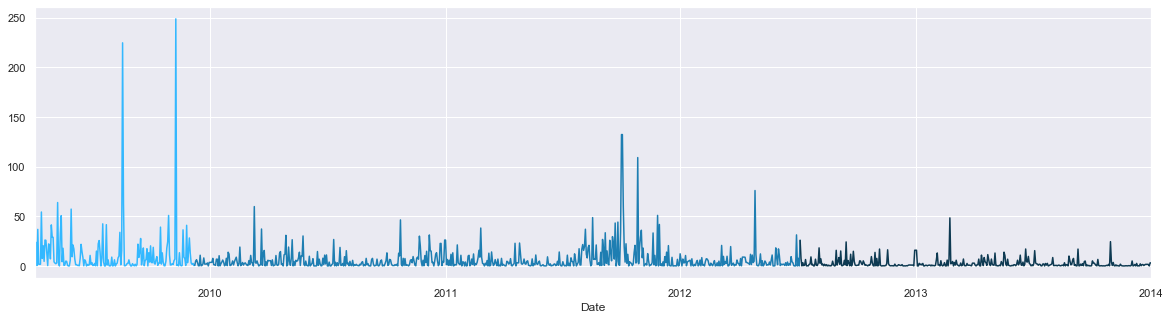

In [27]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

#### Volatility Trends for Each PeriodVolatility Trends for Each Period

In [28]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 475.8106472182344
Iteration:     10,   Func. Count:     65,   Neg. LLF: 475.03031772801364
Iteration:     15,   Func. Count:     95,   Neg. LLF: 474.9915210237318
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 474.9915209714288
            Iterations: 15
            Function evaluations: 95
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1526.9228402592855
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1526.73169543683
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1526.7316954355856
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     38,   Neg. LLF: 724.56203649128
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 724.5578157322791
            Iterations: 7
            F

In [29]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.992
Distribution:                  Normal   AIC:                           957.983
Method:            Maximum Likelihood   BIC:                           970.710
                                        No. Observations:                  178
Date:                Wed, Jul 15 2020   Df Residuals:                      174
Time:                        15:52:35   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1571      0.266      0.590      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6195      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.197e-02      1.675  9.401e-02 [-2.624e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [30]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Wed, Jul 15 2020   Df Residuals:                      668
Time:                        15:52:35   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [31]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Wed, Jul 15 2020   Df Residuals:                      386
Time:                        15:52:35   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""